In [19]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
L = []
calc_no = 40           # number of iterations of f_mod
f_mod = [None]*calc_no
mod_is_unicornn = 0     # set to 0 if modified cases are new networks (and not unicornn)
lstm = 1                # set =0 when modified cases model is "not" LSTM

for i in range(calc_no):
    f_mod[i] = open(r"C:\Users\shrey\Documents\Box Sync\Stanford_academics\2021-2022\Fall Quarter\CS 229\Project\Academic_Influence_Prediction-main\LSTM\run2\results\log_{}.txt".format(str(i+1)), 'r')

    f_all = f_mod
        
for j, f in enumerate(f_all):
    blew = 1                  # to record whether or not the computations blew right off the start (i.e. gave NaN --> blew == 1) 
    blew_f = 1                # to record whether or not the computations blew eventually
    data = {}
    train_loss = []
    eval_loss = []
    test_loss = []
    best_eval_loss      = None
    best_eval_test_loss = None
    final_train_loss    = None
    final_eval_loss     = None
    final_test_loss     = None
    run_time            = None
    L1_init = ''    # Layer 1 weights and biases initialization
    L2_init = ''    # Layer 2 weights and biases initialization
    L3_init = ''    # Layer 3 weights and biases initialization
    cy_cz_init = ''
    by_bz_init = ''
    for i, row in enumerate(f):
        if ('nn.init' in row) and (0 <= i <= 4):
            row = row.split('# ')
            row = row[1].split('init.')
            L1_init = L1_init + str(row[1])
        elif ('nn.init' in row) and (5 <= i <= 9):
            row = row.split('# ')
            row = row[1].split('init.')
            L2_init = L2_init + str(row[1])
        elif ('nn.init' in row) and (10 <= i <= 14):
            row = row.split('# ')
            row = row[1].split('init.')
            L3_init = L3_init + str(row[1])
        elif 'cy_, cz_' in row:
            row = row.split(' = ')
            cy_cz_init = str(row[1])
        elif 'by_, bz_' in row:
            row = row.split(' = ')
            by_bz_init = str(row[1])
        elif 'learning rate' in row:
            row = row.split(', ')
            lr = float(row[0].split(' = ')[1])     # learning rate
            if lstm == 0:
                dt = float(row[1].split(' = ')[1])     # time-step
                if f == f_main or (mod_is_unicornn == 1):
                    alpha   = float(row[2].split(' = ')[1])  # alpha
                    gamma   = ''
                    epsilon = ''
                else:
                    alpha   = ''
                    gamma   = float(row[2].split(' = ')[1])   
                    epsilon = float(row[3].split(' = ')[1])
            else:
                dt      = None
                alpha   = None
                gamma   = None
                epsilon = None
        elif '##' not in row:    
            row = row.split(': ')
            if 'hours' in row[1]:
                run_time = float(row[1][:-6])      # computation run time
                blew = 0
            elif row[0] == 'train loss' or row[0] == 'train accuracy':
                train_loss.append(float(row[1][:-1]))
            elif row[0] == 'eval loss' or row[0] == 'eval accuracy':
                eval_loss.append(float(row[1][:-1]))  
            elif row[0] == 'test loss' or row[0] == 'test accuracy':
                test_loss.append(float(row[1][:-1]))
            elif row[0] == 'best eval loss' or row[0] == 'best eval accuracy':
                best_eval_loss = float(row[1][:-1]) 
            elif row[0] == 'best eval test loss' or row[0] == 'best eval test accuracy':
                best_eval_test_loss = float(row[1][:-1])
            elif row[0] == 'final test loss' or row[0] == 'final test accuracy':
                final_test_loss = float(row[1][:-1])

    final_eval_loss = eval_loss[-1]

    if final_eval_loss < 1000000.:       # set some large value to filter out NaN cases
        blew_f = 0

    if len(train_loss) != 0:
        final_train_loss = train_loss[-1]
    else:
        train_loss = None

    if len(test_loss) != 0:
        final_test_loss = test_loss[-1]
    else:
        test_loss = None

    if (best_eval_loss == None) and (len(eval_loss) != 0):
        best_eval_loss = min(eval_loss)

    data["learning_rate"] = lr
    data["time_step"] = dt
    data["alpha"] = alpha
    data["code"] = "mod_{}".format(j+1)
    data["gamma"] = gamma
    data["epsilon"] = epsilon
    data["eval_loss"] = eval_loss
    data["train_loss"] = train_loss
    data["test_loss"] = test_loss
    data["final_train_loss"] = final_train_loss
    data["final_eval_loss"] = final_eval_loss
    data["final_test_loss"] = final_test_loss
    data["best_eval_loss"] = best_eval_loss
    data["best_eval_test_loss"] = best_eval_test_loss
    data["run_time_hrs"] = run_time
    data["blew"] = blew
    data["blew_f"] = blew_f
    data["cy_cz_init"] = cy_cz_init
    data["by_bz_init"] = by_bz_init
#        data["L1_init"] = L1_init
#        data["L2_init"] = L2_init
#        data["L3_init"] = L3_init

    df = pd.DataFrame(data)
    L.append(df)

DataF = pd.concat(L)    # Entire DataFrame

In [21]:
DataF

,learning_rate,time_step,alpha,code,gamma,epsilon,eval_loss,train_loss,test_loss,final_train_loss,final_eval_loss,final_test_loss,best_eval_loss,best_eval_test_loss,run_time_hrs,blew,blew_f,cy_cz_init,by_bz_init
0,0.00244,None,None,mod_1,None,None,3982.06,4568.54,4016.87,4524.68,3935.11,3969.42,3935.11,3969.42,0.004,0,0,,
1,0.00244,None,None,mod_1,None,None,3981.86,4568.36,4016.67,4524.68,3935.11,3969.42,3935.11,3969.42,0.004,0,0,,
2,0.00244,None,None,mod_1,None,None,3981.60,4568.13,4016.39,4524.68,3935.11,3969.42,3935.11,3969.42,0.004,0,0,,
3,0.00244,None,None,mod_1,None,None,3981.25,4567.82,4016.02,4524.68,3935.11,3969.42,3935.11,3969.42,0.004,0,0,,
4,0.00244,None,None,mod_1,None,None,3980.80,4567.43,4015.56,4524.68,3935.11,3969.42,3935.11,3969.42,0.004,0,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.00095,None,None,mod_40,None,None,3959.46,4547.43,3994.05,4547.41,3959.44,3994.02,3959.44,3994.02,0.006,0,0,,
496,0.00095,None,None,mod_40,None,None,3959.46,4547.42,3994.04,4547.41,3959.44,3994.02,3959.44,3994.02,0.006,0,0,,
497,0.00095,None,None,mod_40,None,None,3959.45,4547.42,3994.04,4547.41,3959.44,3994.02,3959.44,3994.02,0.006,0,0,,
498,0.00095,None,None,mod_40,None,None,3959.45,4547.41,3994.03,4547.41,3959.44,3994.02,3959.44,3994.02,0.006,0,0,,


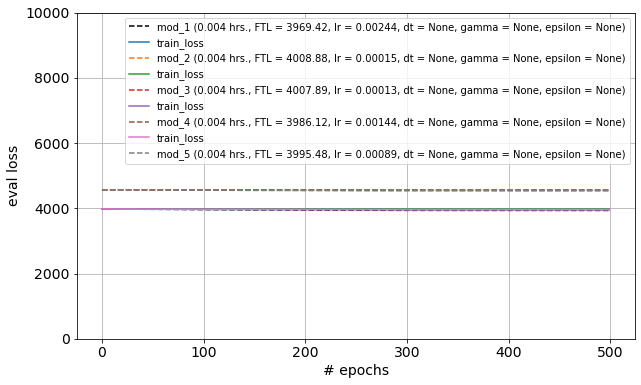

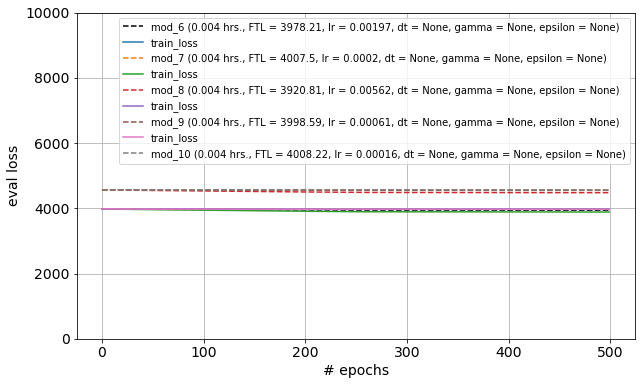

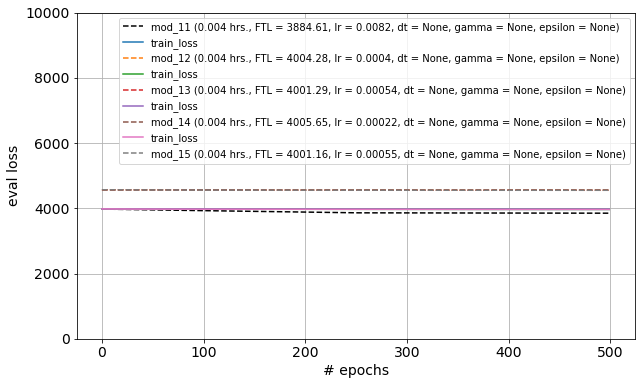

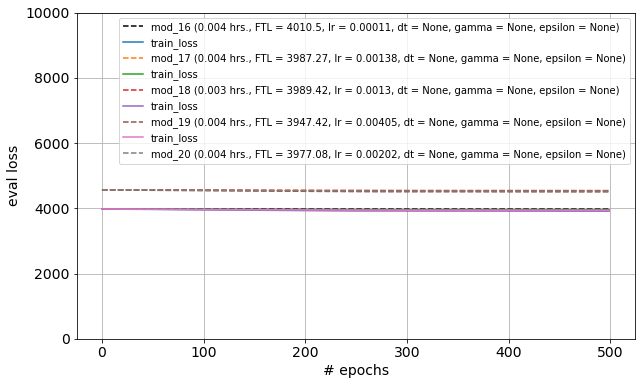

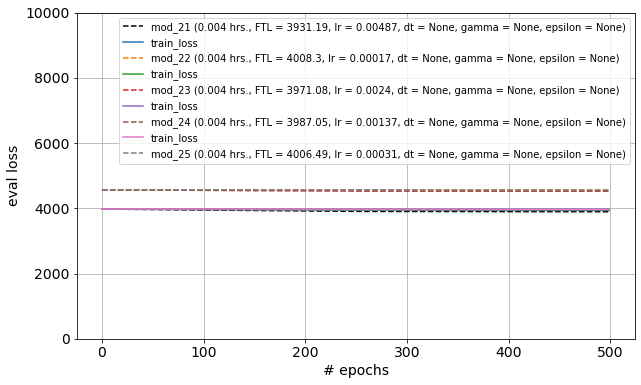

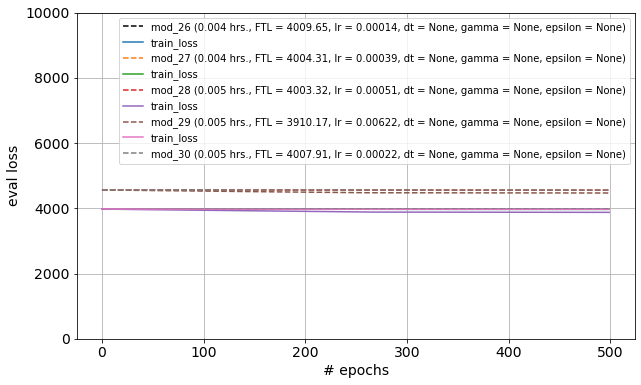

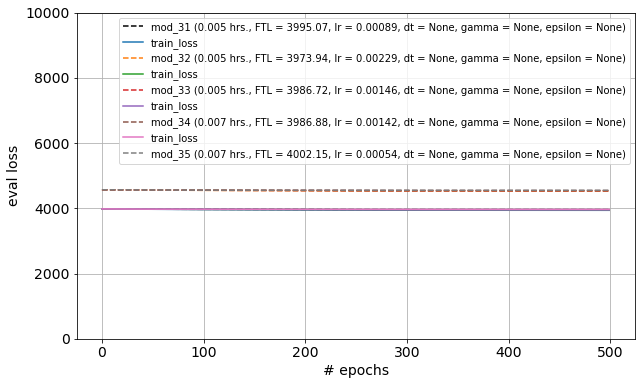

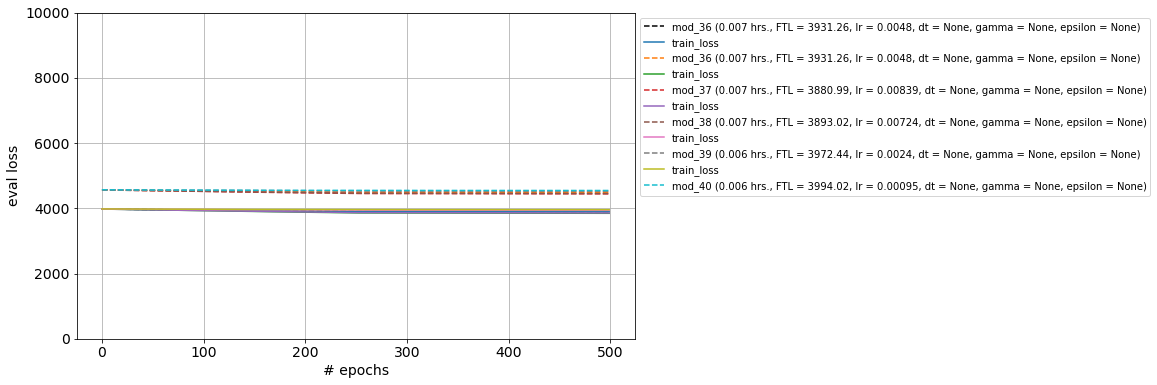

In [22]:
# Plot all the cases
nrp    = 5                            # number of results in one plot
n_plots = ((calc_no - 1)//nrp) + 1     # no. of plots (== ((total # results - 1)//no. of results in one plot) + 1)

df_mod          = [None]*calc_no    # list of dataframes, where each element is for each iteration of the modified unicornn
run_time_mod    = [None]*calc_no
final_testL_mod = [None]*calc_no
lr_mod          = [None]*calc_no
dt_mod          = [None]*calc_no
gamma_mod       = [None]*calc_no
epsilon_mod     = [None]*calc_no

for i in range(calc_no):
    df_mod[i]          = DataF[(DataF["code"] == "mod_{}".format(i+1))]  
    run_time_mod[i]    = df_mod[i]["run_time_hrs"][0] 
    final_testL_mod[i] = df_mod[i]["final_test_loss"][0]
    lr_mod[i]          = df_mod[i]["learning_rate"][0]
    dt_mod[i]          = df_mod[i]["time_step"][0]
    gamma_mod[i]       = df_mod[i]["gamma"][0]
    epsilon_mod[i]     = df_mod[i]["epsilon"][0]

for j in range(n_plots):
    legend = []                 # list of legends per figure (or plot)
    ax     = df_mod[j*nrp].plot(y = "eval_loss", style="--", color='black', grid=True, figsize=(10,6), fontsize = 14)

    ax.set_ylim(0, 10000)
    ax.set_xlabel("# epochs", fontsize = 14)
    ax.set_ylabel("eval loss", fontsize = 14)
    legend.append("mod_{} ({} hrs., FTL = {}, lr = {}, dt = {}, gamma = {}, epsilon = {})".format(j*nrp+1, run_time_mod[j*nrp], final_testL_mod[j*nrp], lr_mod[j*nrp], dt_mod[j*nrp], gamma_mod[j*nrp], epsilon_mod[j*nrp]))
    legend.append("train_loss")

    if j != (n_plots - 1):
        for i in range(j*nrp+1, j*nrp + nrp):           
            df_mod[i].plot(y = "eval_loss", style="-", ax=ax,  grid=True)
            df_mod[i].plot(y = "train_loss", style="--", ax=ax,  grid=True)

            legend.append("mod_{} ({} hrs., FTL = {}, lr = {}, dt = {}, gamma = {}, epsilon = {})".format(i+1, run_time_mod[i], final_testL_mod[i], lr_mod[i], dt_mod[i], gamma_mod[i], epsilon_mod[i]))
            legend.append("train_loss")
    else:
        for i in range(j*nrp, calc_no):           
            df_mod[i].plot(y = "eval_loss", style="-", ax=ax,  grid=True)
            df_mod[i].plot(y = "train_loss", style="--", ax=ax,  grid=True)

            legend.append("mod_{} ({} hrs., FTL = {}, lr = {}, dt = {}, gamma = {}, epsilon = {})".format(i+1, run_time_mod[i], final_testL_mod[i], lr_mod[i], dt_mod[i], gamma_mod[i], epsilon_mod[i]))
            legend.append("train_loss")

    ax.legend(legend, fontsize = 10,bbox_to_anchor=(1, 1))

